# FIFA 2023 Steam Review 

### About Dataset
Dataset is a review compilation of 25737 Steam Reviews for Fifa 23.

| Column                           | Description                                                                                                      |
|----------------------------------|------------------------------------------------------------------------------------------------------------------|
| id                               | A special number assigned to every review.                                                                         |
| language                         | The language used to write the review.                                                                             |
| review                           | The user-provided textual content of the review.                                                                  |
| created                          | The time the review was initiated, as indicated by the timestamp.                                                |
| voted_up                         | A boolean value that indicates whether or not other users have voted a review up.                                |
| votes_up                         | The quantity of affirmative votes the review obtained.                                                            |
| comment_count                    | The quantity of remarks left on the review.                                                                       |
| steam_purchase                   | A boolean variable that indicates whether or not the user bought FIFA 2023 through Steam.                       |
| received_for_free                | A boolean value that indicates if the game was given to the user for free.                                        |
| written_during_early_access      | A boolean showing if the review was composed when the game was still in its initial access.                        |
| author_num_games_owned           | The amount of video games that the writer of the review owns.                                                      |
| author_num_reviews               | The sum of the author's submitted reviews.                                                                        |
| author_playtime_forever          | The author's overall playtime (in minutes) for all games.                                                         |
| author_playtime_last_two_weeks   | The author's playtime over the previous two weeks, measured in minutes.                                            |
| author_playtime_at_review        | The author's playtime (in minutes) at the moment the review was written.                                           |
| author_last_played               | The date and time of the author's most recent Steam game play.                                                     |


Source: https://www.kaggle.com/datasets/noahx1/fifa-23-steam-reviews/

In [1]:
# Importing the neccessary library and tool kit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wisdomadike/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Loading our dataset
fifa_review = pd.read_csv('fifa23_steam_reviews.csv')

fif_review_sent = fifa_review.copy()
fifa_review.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134539477,english,Mantap,2023-03-12 14:34:26,True,0,0,True,False,False,9,1,7255,1662,7255,2023-03-12 14:34:13
1,134538118,english,yum,2023-03-12 14:10:47,True,0,0,True,False,False,18,8,3842,481,3811,2023-03-12 14:40:53
2,134538086,english,i hate all the sweats who never touch grass\n,2023-03-12 14:10:04,True,0,0,True,False,False,6,1,16462,3041,16462,2023-03-12 13:38:03
3,134537160,english,Fxxk u EAAntiCheat! Fxxk u EA!,2023-03-12 13:53:26,False,0,0,True,False,False,282,11,4652,13,4652,2023-03-12 13:50:21
4,134536841,english,fifa is the best,2023-03-12 13:47:39,True,0,0,True,False,False,1,1,9552,261,9544,2023-03-12 13:57:39


In [3]:
# Lets check the shape of the dataset
fifa_review.shape

(25737, 16)

In [4]:
fifa_review.steam_purchase.unique()

array([ True, False])

The dataset contains a total of 16 features and 25737 reviews.

In [5]:
# Describing the dataset
fifa_review.describe()

,id,votes_up,comment_count,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review
count,2.573700e+04,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000,25737.000000
mean,1.280653e+08,2.191126,0.059098,58.070249,6.349613,9964.320744,750.215254,3273.325796
std,3.464853e+06,36.714773,1.053199,170.696836,33.784766,11524.811276,1286.305022,5730.607475
min,1.230130e+08,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,5.000000
25%,1.242492e+08,0.000000,0.000000,7.000000,1.000000,2202.000000,0.000000,379.000000
50%,1.287613e+08,0.000000,0.000000,19.000000,2.000000,6416.000000,156.000000,1274.000000
75%,1.308838e+08,0.000000,0.000000,51.000000,6.000000,13717.000000,1065.000000,3652.000000
max,1.345395e+08,1897.000000,72.000000,8221.000000,4310.000000,157368.000000,20157.000000,120109.000000


In [6]:
# Checking for missing values
fifa_review.isnull().sum()

id                                 0
language                           0
review                            86
created                            0
voted_up                           0
votes_up                           0
comment_count                      0
steam_purchase                     0
recieved_for_free                  0
written_during_early_access        0
author_num_games_owned             0
author_num_reviews                 0
author_playtime_forever            0
author_playtime_last_two_weeks     0
author_playtime_at_review          0
author_last_played                 0
dtype: int64

We currently have 86 missing values in the review column.

In [7]:
fifa_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25737 entries, 0 to 25736
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              25737 non-null  int64 
 1   language                        25737 non-null  object
 2   review                          25651 non-null  object
 3   created                         25737 non-null  object
 4   voted_up                        25737 non-null  bool  
 5   votes_up                        25737 non-null  int64 
 6   comment_count                   25737 non-null  int64 
 7   steam_purchase                  25737 non-null  bool  
 8   recieved_for_free               25737 non-null  bool  
 9   written_during_early_access     25737 non-null  bool  
 10  author_num_games_owned          25737 non-null  int64 
 11  author_num_reviews              25737 non-null  int64 
 12  author_playtime_forever         25737 non-null

In [8]:
# Lets drop null values
fifa_review = fifa_review.dropna(axis=0)
fifa_review.isnull().sum()

id                                0
language                          0
review                            0
created                           0
voted_up                          0
votes_up                          0
comment_count                     0
steam_purchase                    0
recieved_for_free                 0
written_during_early_access       0
author_num_games_owned            0
author_num_reviews                0
author_playtime_forever           0
author_playtime_last_two_weeks    0
author_playtime_at_review         0
author_last_played                0
dtype: int64

Now we have no missing values

steam_purchase
True     21184
False     4467
Name: count, dtype: int64


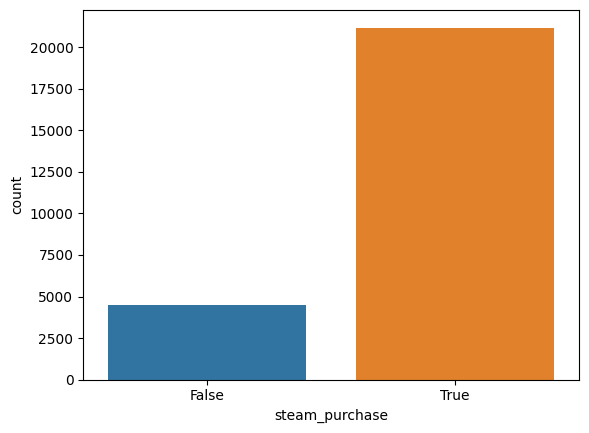

In [9]:
# Checking our target variable
sns.countplot(fifa_review, x="steam_purchase")
print(fifa_review['steam_purchase'].value_counts())

This is a complete imbalance dataset. We have more of True based on those who wants to purchase than false.

### TEXT MINING

#### Preprocessing

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
# A function for a corpus
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [12]:
fifa_review['review'] = fifa_review['review'].apply(preprocess_text)

fifa_review.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134539477,english,[mantap],2023-03-12 14:34:26,True,0,0,True,False,False,9,1,7255,1662,7255,2023-03-12 14:34:13
1,134538118,english,[yum],2023-03-12 14:10:47,True,0,0,True,False,False,18,8,3842,481,3811,2023-03-12 14:40:53
2,134538086,english,"[hate, sweat, never, touch, grass]",2023-03-12 14:10:04,True,0,0,True,False,False,6,1,16462,3041,16462,2023-03-12 13:38:03
3,134537160,english,"[fxxk, u, eaanticheat, fxxk, u, ea]",2023-03-12 13:53:26,False,0,0,True,False,False,282,11,4652,13,4652,2023-03-12 13:50:21
4,134536841,english,"[fifa, best]",2023-03-12 13:47:39,True,0,0,True,False,False,1,1,9552,261,9544,2023-03-12 13:57:39


In [13]:
# Creating a matrix representation of the text data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_ = CountVectorizer()
X = vectorizer_.fit_transform(fifa_review['review'].map(''.join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20834,20835,20836,20837,20838,20839,20840,20841,20842,20843
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y = fifa_review['steam_purchase']

<Axes: xlabel='steam_purchase', ylabel='count'>

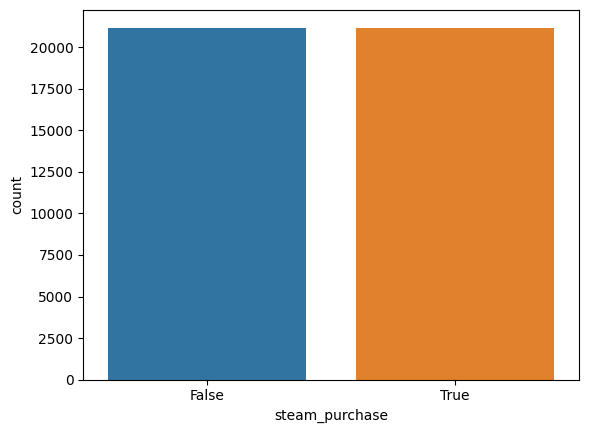

In [15]:
# For our imbalanced target variable 'steam_purchase', we will balance using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
resample = RandomOverSampler(random_state = 0)
X_train_oversampled, y_train_oversampled = resample.fit_resample(X, y)

sns.countplot(x = y_train_oversampled)

In [16]:
# Performing train-test split for our ML model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, train_size = 0.8, test_size = 0.2, random_state = 42)

In [17]:
print("Training dataset:", X_train.shape, y_train.shape)
print("Testing dataset:", X_test.shape, y_test.shape)

Training dataset: (33894, 20844) (33894,)
Testing dataset: (8474, 20844) (8474,)


#### Naives Bayes Model

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_oversampled, y_train_oversampled)

MultinomialNB()

In [19]:
# Predicted values
y_pred = nb.predict(X_test)
y_pred[0:10]

array([False, False,  True, False,  True,  True, False,  True,  True,
       False])

In [20]:
# Actual values
y_test.values[0:10]

array([False, False,  True, False,  True,  True, False,  True,  True,
       False])

In [21]:
# Checking accuracy and confusion Matrix
from sklearn import metrics

acc_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc_score))
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusuion Matrix:")
print(c_matrix, '\n\n')

class_report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n",)
print(class_report)

accuracy:0.87


Confusuion Matrix:
[[3744  443]
 [ 633 3654]] 


Classification Report: 

              precision    recall  f1-score   support

       False       0.86      0.89      0.87      4187
        True       0.89      0.85      0.87      4287

    accuracy                           0.87      8474
   macro avg       0.87      0.87      0.87      8474
weighted avg       0.87      0.87      0.87      8474



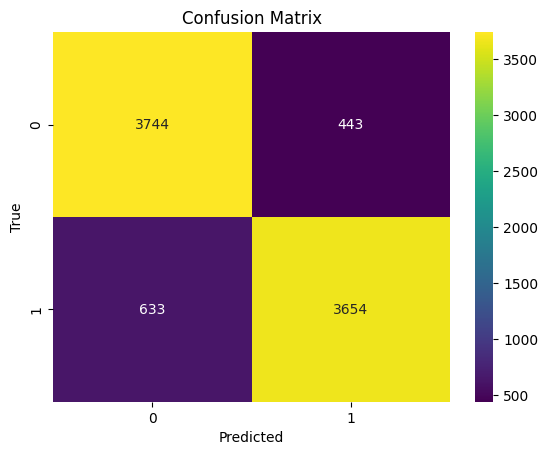

In [22]:
ax = sns.heatmap(c_matrix, cmap = "viridis", annot = True, fmt = "d")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### SENTIMENT ANALYSIS

In [23]:
fif_review_sent.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134539477,english,Mantap,2023-03-12 14:34:26,True,0,0,True,False,False,9,1,7255,1662,7255,2023-03-12 14:34:13
1,134538118,english,yum,2023-03-12 14:10:47,True,0,0,True,False,False,18,8,3842,481,3811,2023-03-12 14:40:53
2,134538086,english,i hate all the sweats who never touch grass\n,2023-03-12 14:10:04,True,0,0,True,False,False,6,1,16462,3041,16462,2023-03-12 13:38:03
3,134537160,english,Fxxk u EAAntiCheat! Fxxk u EA!,2023-03-12 13:53:26,False,0,0,True,False,False,282,11,4652,13,4652,2023-03-12 13:50:21
4,134536841,english,fifa is the best,2023-03-12 13:47:39,True,0,0,True,False,False,1,1,9552,261,9544,2023-03-12 13:57:39


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [25]:
# Lets extract the values from the dictionary and create new columns within our dataframe

fif_review_sent['compound'] = [sentiment.polarity_scores(str(x))['compound'] if isinstance(x, (str, float)) else 0.0 for x in fif_review_sent['review']]
fif_review_sent['neg'] = [sentiment.polarity_scores(str(x))['neg'] if isinstance(x, (str, float)) else 0.0 for x in fif_review_sent['review']]
fif_review_sent['neu'] = [sentiment.polarity_scores(str(x))['neu'] if isinstance(x, (str, float)) else 0.0 for x in fif_review_sent['review']]
fif_review_sent['pos'] = [sentiment.polarity_scores(str(x))['pos'] if isinstance(x, (str, float)) else 0.0 for x in fif_review_sent['review']]

In [26]:
fif_review_sent.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,compound,neg,neu,pos
0,134539477,english,Mantap,2023-03-12 14:34:26,True,0,0,True,False,False,9,1,7255,1662,7255,2023-03-12 14:34:13,0.0000,0.000,1.000,0.000
1,134538118,english,yum,2023-03-12 14:10:47,True,0,0,True,False,False,18,8,3842,481,3811,2023-03-12 14:40:53,0.0000,0.000,1.000,0.000
2,134538086,english,i hate all the sweats who never touch grass\n,2023-03-12 14:10:04,True,0,0,True,False,False,6,1,16462,3041,16462,2023-03-12 13:38:03,-0.5719,0.346,0.654,0.000
3,134537160,english,Fxxk u EAAntiCheat! Fxxk u EA!,2023-03-12 13:53:26,False,0,0,True,False,False,282,11,4652,13,4652,2023-03-12 13:50:21,0.0000,0.000,1.000,0.000
4,134536841,english,fifa is the best,2023-03-12 13:47:39,True,0,0,True,False,False,1,1,9552,261,9544,2023-03-12 13:57:39,0.6369,0.000,0.417,0.583


In [27]:
desc = fif_review_sent[['compound', 'neg', 'neu', 'pos']].describe()
desc

,compound,neg,neu,pos
count,25737.000000,25737.000000,25737.000000,25737.000000
mean,0.057938,0.116404,0.611539,0.232075
std,0.474514,0.210929,0.346967,0.324987
min,-0.999000,0.000000,0.000000,0.000000
25%,-0.238200,0.000000,0.328000,0.000000
50%,0.000000,0.000000,0.683000,0.061000
75%,0.440400,0.158000,1.000000,0.365000
max,0.999900,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

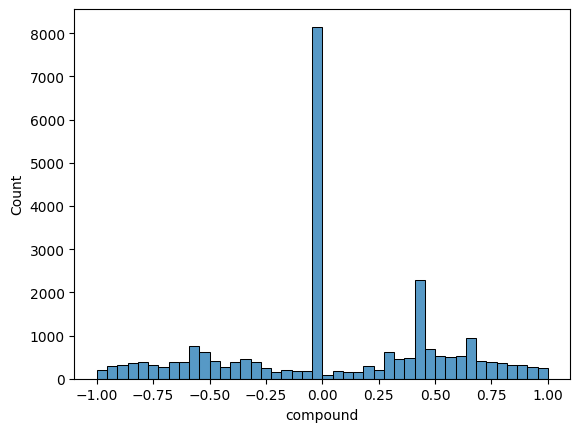

In [28]:
sns.histplot(fif_review_sent.compound)

<Axes: xlabel='neu', ylabel='Count'>

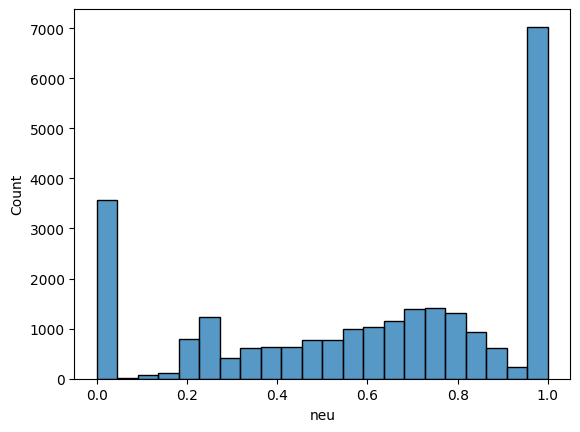

In [29]:
sns.histplot(fif_review_sent.neu)

<Axes: xlabel='pos', ylabel='Count'>

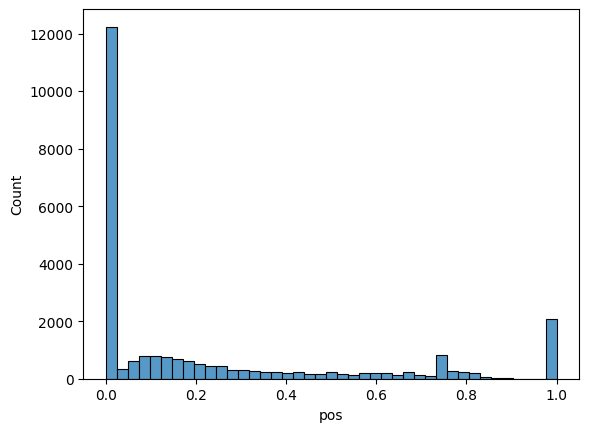

In [30]:
sns.histplot(fif_review_sent.pos)

<Axes: xlabel='neg', ylabel='Count'>

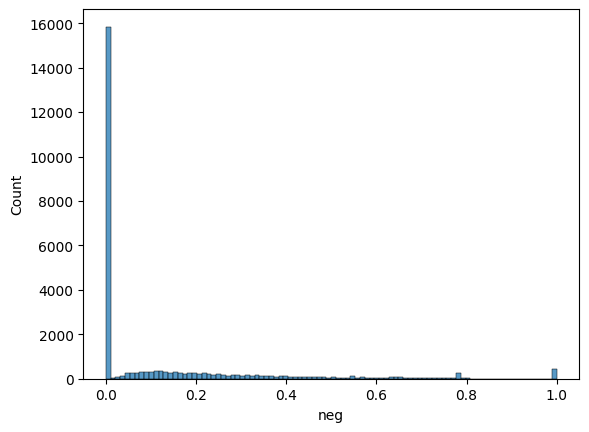

In [31]:
sns.histplot(fif_review_sent.neg)

In [32]:
# Looking at negetive reviews we have based on purchase
(fif_review_sent['compound'] <= 0).groupby(fif_review_sent['steam_purchase']).sum()

steam_purchase
False     2662
True     12679
Name: compound, dtype: int64

Despite over 15,000 negative review, 12,000 people still bought the Fifa 2023 product while over 2000 didn't buy.

In [33]:
# Knowing the percentage of negative reviews based on purchases

percent_negative = pd.DataFrame((fif_review_sent.compound <= 0).groupby(fif_review_sent['steam_purchase']).sum()
                                /fif_review_sent['steam_purchase'].groupby(fif_review_sent['steam_purchase']).count() * 100,
                                columns = ['% negative reviews']).sort_values(by = '% negative reviews')

percent_negative

,% negative reviews
steam_purchase,
False,59.446181
True,59.640623


<Axes: xlabel='steam_purchase', ylabel='% negative reviews'>

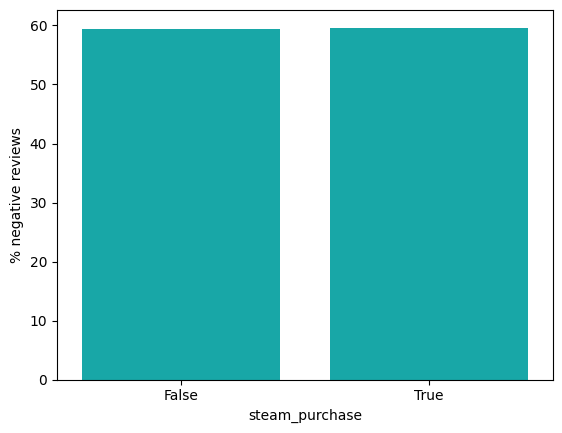

In [34]:
sns.barplot(x = percent_negative.index, y = percent_negative['% negative reviews'], color = 'c')

From the chart, despite negative comments and reviews, there is still almost 60% sales of the Fifa 2023 product.

In [35]:
# Dropping NA to avoid missing values
fif_review_sent = fif_review_sent.dropna(axis=0)

In [36]:
# Lets prepare our data for WordCloud visualization based on the steam purchases

fif_review_sent['cleaned_review'] = fif_review_sent['review'].apply(preprocess_text)

In [37]:
positive_review_subset = fif_review_sent.loc[(fif_review_sent['steam_purchase'] == True) & (fif_review_sent['compound'] > 0), :]

negative_review_subset = fif_review_sent.loc[(fif_review_sent['steam_purchase'] == True) & (fif_review_sent['compound'] <= 0), :]

negative_review_subset.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,...,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,compound,neg,neu,pos,cleaned_review
0,134539477,english,Mantap,2023-03-12 14:34:26,True,0,0,True,False,False,...,1,7255,1662,7255,2023-03-12 14:34:13,0.0000,0.000,1.000,0.000,[mantap]
1,134538118,english,yum,2023-03-12 14:10:47,True,0,0,True,False,False,...,8,3842,481,3811,2023-03-12 14:40:53,0.0000,0.000,1.000,0.000,[yum]
2,134538086,english,i hate all the sweats who never touch grass\n,2023-03-12 14:10:04,True,0,0,True,False,False,...,1,16462,3041,16462,2023-03-12 13:38:03,-0.5719,0.346,0.654,0.000,"[hate, sweat, never, touch, grass]"
3,134537160,english,Fxxk u EAAntiCheat! Fxxk u EA!,2023-03-12 13:53:26,False,0,0,True,False,False,...,11,4652,13,4652,2023-03-12 13:50:21,0.0000,0.000,1.000,0.000,"[fxxk, u, eaanticheat, fxxk, u, ea]"
6,134530021,english,This game is terrible. Worse than 2022. Terrib...,2023-03-12 11:24:22,False,2,0,True,False,False,...,7,330,1,330,2023-03-08 10:26:00,-0.5346,0.151,0.808,0.042,"[game, terribl, wors, 2022, terribl, interfac,..."


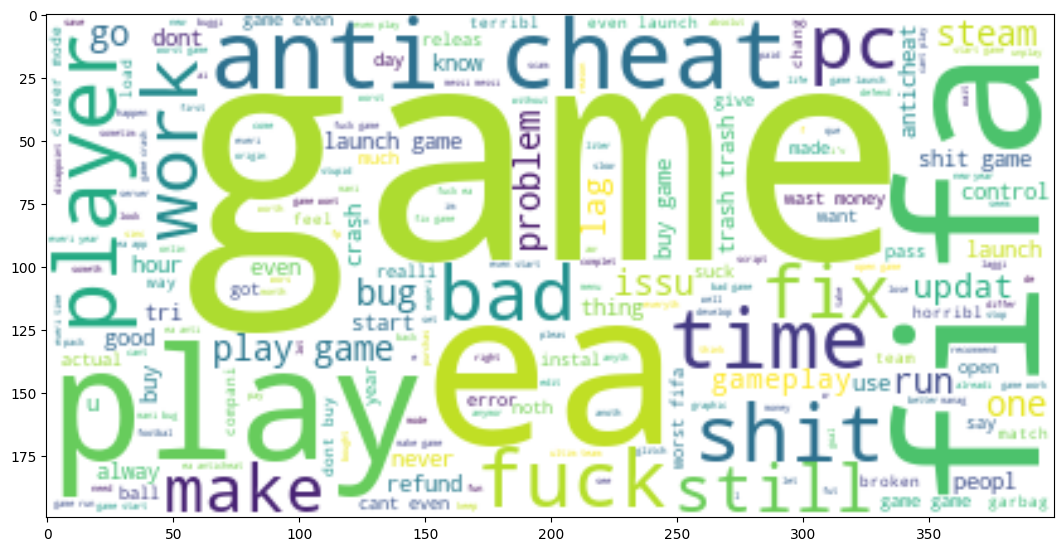

In [38]:
# Wordcloud of words from negative review base on those who bought the product

negative_token = [word for x in negative_review_subset['cleaned_review'] for word in x]

word_cloud_gen = WordCloud(background_color = 'white').generate_from_text(' '.join(negative_token))

plt.figure(figsize = (13, 13))
plt.imshow(word_cloud_gen, interpolation = 'bilinear')
plt.show()

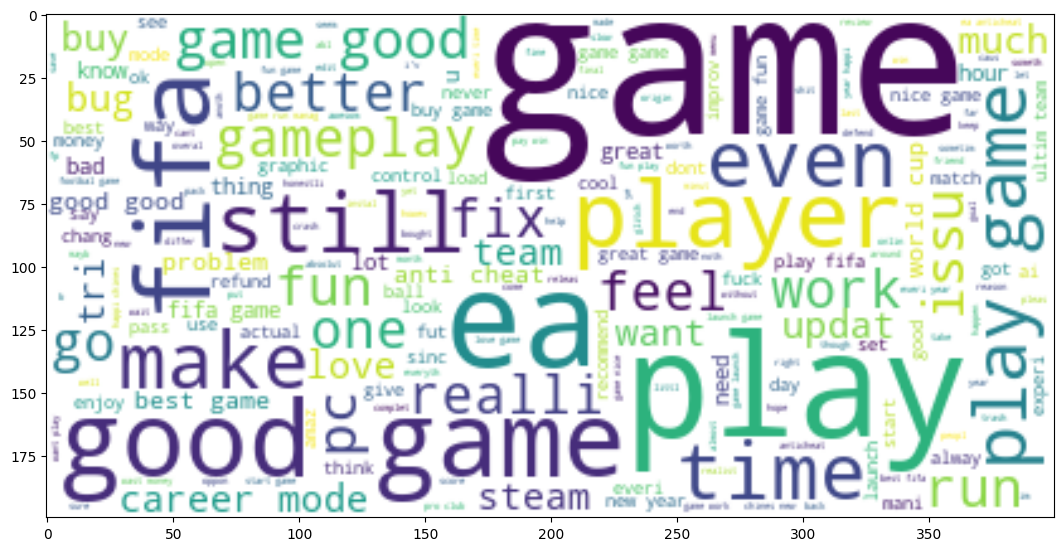

In [39]:
# Wordcloud of words from positive review base on those who bought the product

positive_token = [word for x in positive_review_subset['cleaned_review'] for word in x]

word_cloud_gen = WordCloud(background_color = 'white').generate_from_text(' '.join(positive_token))

plt.figure(figsize = (13, 13))
plt.imshow(word_cloud_gen, interpolation = 'bilinear')
plt.show()

In [40]:
# Repeating the same process for those who didn't make purchase

positive_review_subset_ = fif_review_sent.loc[(fif_review_sent['steam_purchase'] == False) & (fif_review_sent['compound'] > 0), :]

negative_review_subset_ = fif_review_sent.loc[(fif_review_sent['steam_purchase'] == False) & (fif_review_sent['compound'] <= 0), :]

negative_review_subset_.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,...,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,compound,neg,neu,pos,cleaned_review
11,134523111,english,Game doesn't even opened on PC,2023-03-12 08:42:13,False,0,0,False,False,False,...,1,6,6,6,2023-03-11 20:48:22,0.0,0.0,1.0,0.0,"[game, even, open, pc]"
24,134514367,english,the game crashed,2023-03-12 04:59:20,True,0,0,False,False,False,...,16,11,11,11,2023-03-12 04:22:22,0.0,0.0,1.0,0.0,"[game, crash]"
43,134500002,english,ere,2023-03-11 23:24:56,True,0,0,False,False,False,...,1,21748,9625,20957,2023-03-12 13:19:26,0.0,0.0,1.0,0.0,[ere]
47,134498461,english,its the same fifa from 97,2023-03-11 22:51:09,False,0,0,False,False,False,...,6,456,456,456,2023-03-09 21:56:47,0.0,0.0,1.0,0.0,"[fifa, 97]"
69,134472473,english,FIFA 23,2023-03-11 15:14:31,True,0,0,False,False,False,...,1,137,0,137,2022-12-17 23:45:35,0.0,0.0,1.0,0.0,"[fifa, 23]"


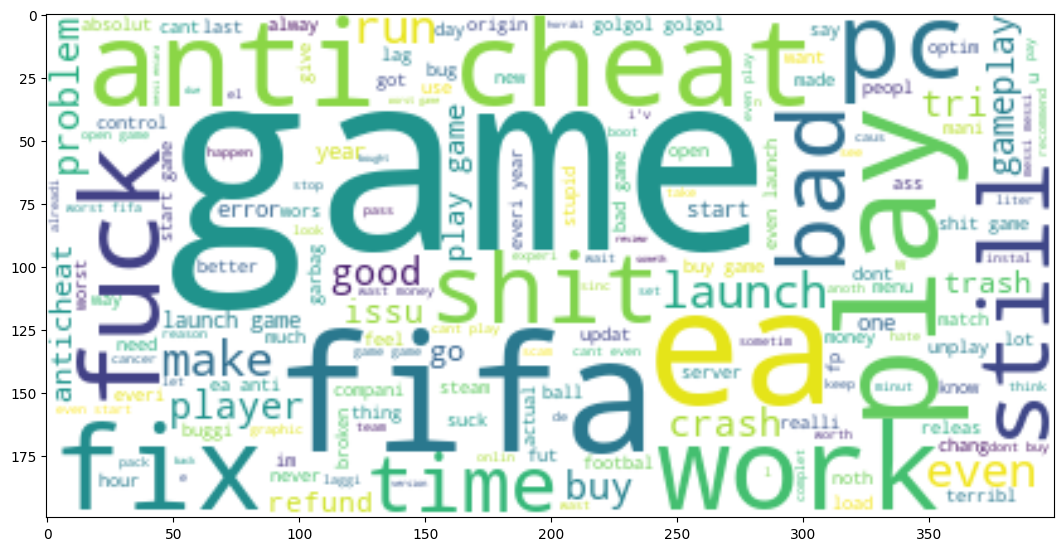

In [41]:
# Wordcloud of words from negative review base on those who didn't make purchases

negative_token_ = [word for x in negative_review_subset_['cleaned_review'] for word in x]

word_cloud_gen_ = WordCloud(background_color = 'white').generate_from_text(' '.join(negative_token_))

plt.figure(figsize = (13, 13))
plt.imshow(word_cloud_gen_, interpolation = 'bilinear')
plt.show()

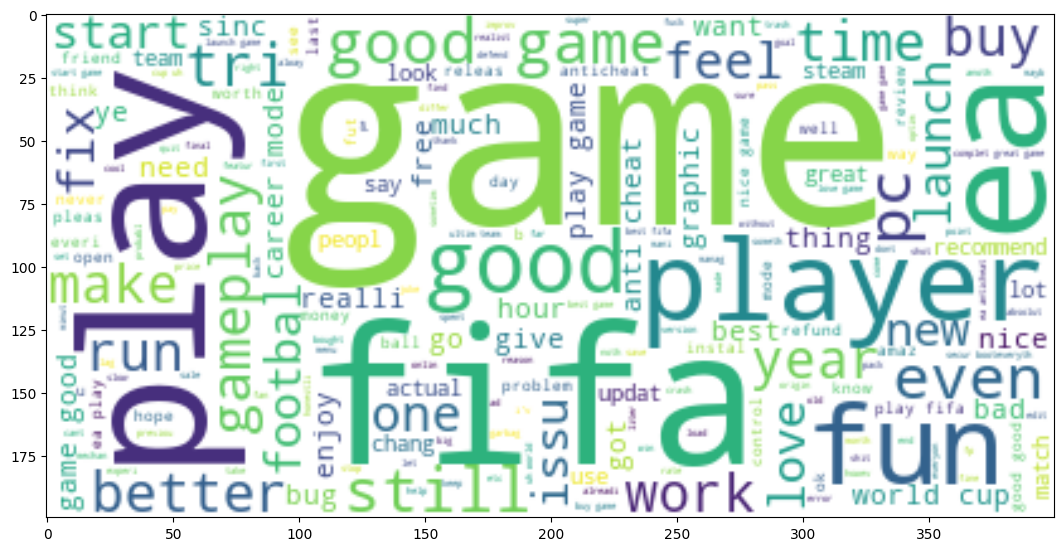

In [42]:
# Wordcloud of words from positive review base on those who didn't make purchase

positive_token_ = [word for x in positive_review_subset_['cleaned_review'] for word in x]

word_cloud_gen_ = WordCloud(background_color = 'white').generate_from_text(' '.join(positive_token_))

plt.figure(figsize = (13, 13))
plt.imshow(word_cloud_gen_, interpolation = 'bilinear')
plt.show()

In [43]:
from nltk.probability import FreqDist

In [44]:
# Using FreqDist to understand most frequent words used in the Negative reviews of those that made purchase

negative_freqdist = FreqDist(negative_token)

negative_freqdist.tabulate(10)

  game     ea   play   fifa   even launch   shit    get   time    fix 
  7891   2133   1913   1610   1354   1099   1056    963    943    942 


In [45]:
# Using FreqDist to understand most frequent words used in the Positive reviews of those that made purchase

positive_freqdist = FreqDist(positive_token)

positive_freqdist.tabulate(10)

  game   good   play   fifa     ea   like    fun    get   time player 
  7267   2646   2578   1795   1258   1138    946    933    891    765 


In [46]:
# Using FreqDist to understand most frequent words used in the Negative reviews of those that didn't made purchase

negative_freqdist_ = FreqDist(negative_token_)

negative_freqdist_.tabulate(10)

  game     ea   fifa   play   even launch   shit    get  cheat    buy 
  1557    398    372    345    303    222    203    181    178    171 


In [47]:
# Using FreqDist to understand most frequent words used in the Negative reviews of those that didn't made purchase

positive_freqdist_ = FreqDist(positive_token_)

positive_freqdist_.tabulate(10)

  game   play   good   fifa     ea   like    get   even    fun player 
  1540    611    511    502    343    285    208    198    182    180 


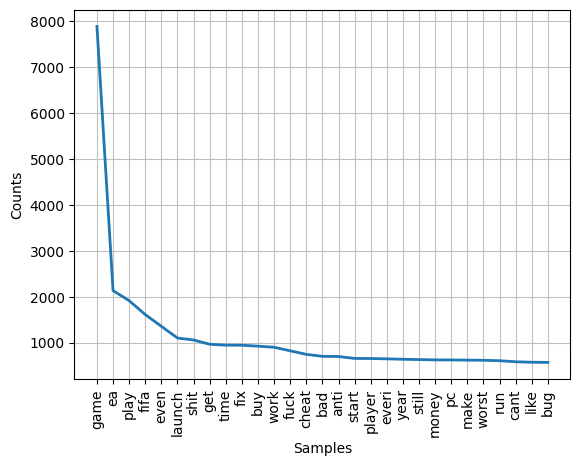

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
# Plotting for negative reviews on those that made purchase
negative_freqdist.plot(29)

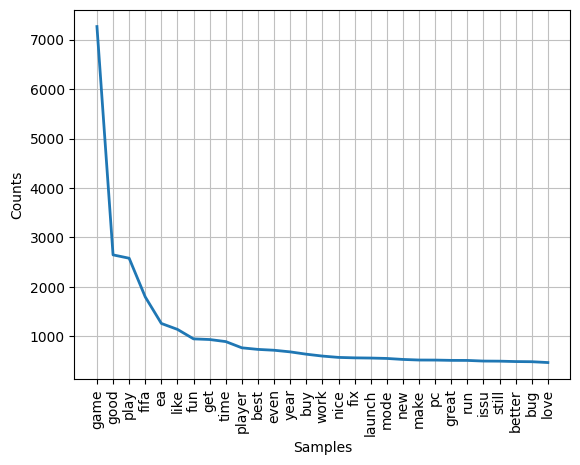

<Axes: xlabel='Samples', ylabel='Counts'>

In [49]:
# Plotting for positive reviews on those that made purchase
positive_freqdist.plot(29)

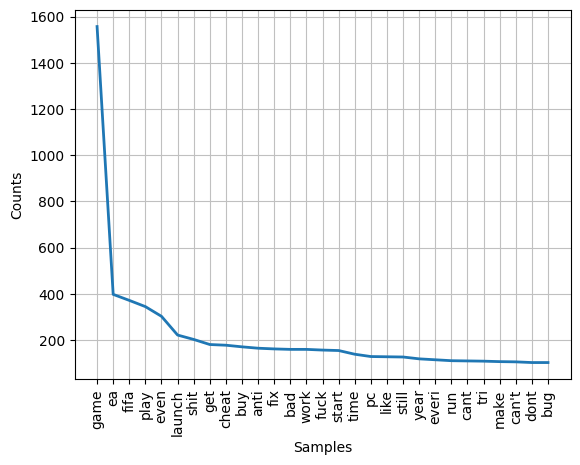

<Axes: xlabel='Samples', ylabel='Counts'>

In [50]:
# Plotting for negative reviews on those that didn't make purchase
negative_freqdist_.plot(29)

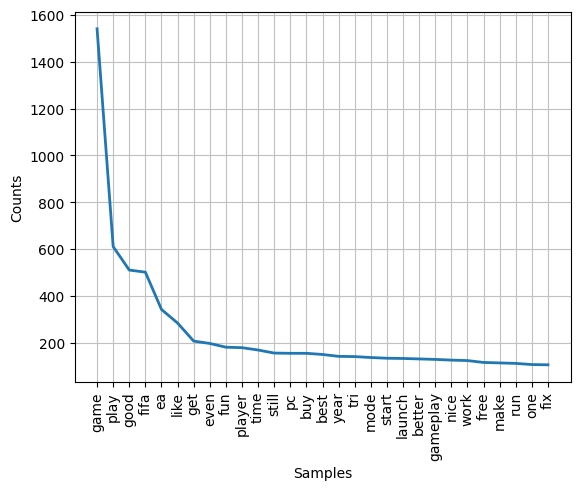

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
# Plotting for positive reviews on those that didn't make purchase
positive_freqdist_.plot(29)